# We import all the necessary libraries for our classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# To train the data we use an inbuild MNIST dataset #

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# We flatten the images to 1D vectors of size 28*28 [784 Dimensional]

In [3]:
X_train_flattened = X_train.reshape(-1, 28*28)
X_test_flattened = X_test.reshape(-1, 28*28)

# To Normalize the pixel values to be between '0' and '1'

In [4]:
X_train_normalized = X_train_flattened / 255.0
X_test_normalized = X_test_flattened / 255.0

# We convert the labels to one-hot encoding #

In [5]:
y_train = to_categorical(y_train, 15)
y_test = to_categorical(y_test, 15)

Autoencoder Architecture:

Encoder: We will compress the image into a smaller latent represntation

In [6]:
input_img = Input(shape=(28*28,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

Decoder: We will reconstruct the image from the compressed respresentation

In [7]:
decoded = Dense(64, activation= 'relu')(encoded)
decoded = Dense(128, activation= 'relu')(decoded)
decoded = Dense(28*28, activation= 'sigmoid')(decoded)

# Combining the encoder and decoder into the autoencoder model #

In [8]:
autoencoder = Model(input_img, decoded)

# Defining the encoder model for feature extraction #

In [9]:
encoder = Model(input_img, encoded)

# Compiling the Autoencoder #

In [10]:
autoencoder.compile(optimizer = 'Adam', loss = 'mse')

# Training Autoencoder #

In [11]:
history = autoencoder.fit(X_train_normalized, X_train_normalized, epochs=15, batch_size=256, shuffle=True, validation_data=(X_test_normalized, X_test_normalized))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0972 - val_loss: 0.0379
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0341 - val_loss: 0.0263
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0257 - val_loss: 0.0232
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0221 - val_loss: 0.0206
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0199 - val_loss: 0.0179
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0180 - val_loss: 0.0167
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0167 - val_loss: 0.0155
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0148 - val_loss: 0.0141
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0141 - val_loss: 0.0134
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0137 - val_loss: 0.0131
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 

# Visualizing the loss curve during training #

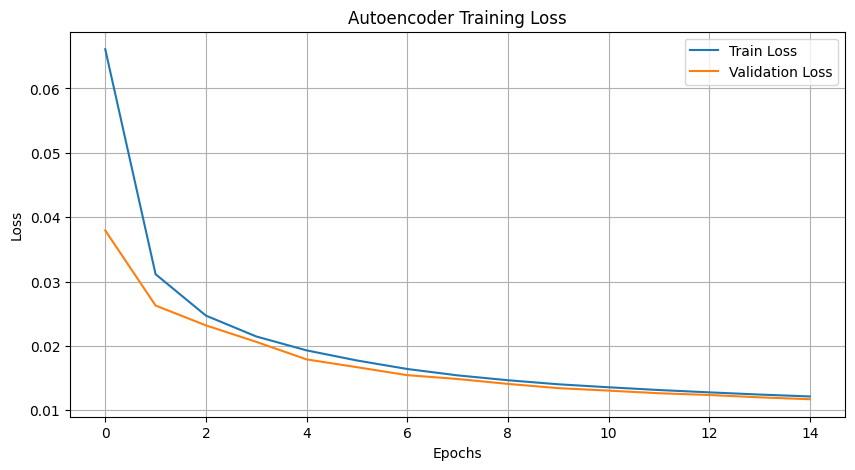

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# We use encoder to extract features form the images #

In [13]:
X_train_encoded = encoder.predict(X_train_normalized)
X_test_encoded = encoder.predict(X_test_normalized)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# We have to build MLP model for classification using the encoded fetures #

In [14]:
MLP_model = Sequential([
    Dense(128, activation='relu', input_shape=(32,)),
    Dense(64, activation='relu'),
    Dense(15, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the MLP Model #

In [15]:
MLP_model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics = ['accuracy'])

# We Train the MLP model with the encoded data #

In [16]:
MLP_history = MLP_model.fit(X_train_encoded, y_train, epochs = 15, batch_size = 256, validation_data = (X_test_encoded, y_test))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6375 - loss: 1.3444 - val_accuracy: 0.8963 - val_loss: 0.3348
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9021 - loss: 0.3197 - val_accuracy: 0.9208 - val_loss: 0.2549
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9215 - loss: 0.2522 - val_accuracy: 0.9270 - val_loss: 0.2233
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9317 - loss: 0.2236 - val_accuracy: 0.9342 - val_loss: 0.2061
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9369 - loss: 0.2019 - val_accuracy: 0.9425 - val_loss: 0.1786
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9446 - loss: 0.1797 - val_accuracy: 0.9480 - val_loss: 0.1709
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9484 - loss: 0.1663 - val_accuracy: 0.9493 - val_loss: 0.1576
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9527 - loss: 0.1543 - val_accuracy: 0.

# Evaluating the MLP model #

In [17]:
test_loss, test_accuracy = MLP_model.evaluate(X_test_encoded, y_test)
print(f'Test Accuracy of MLP: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9557 - loss: 0.1431
Test Accuracy of MLP: 0.9634


# Plotting the accuracy of the MLP during training #

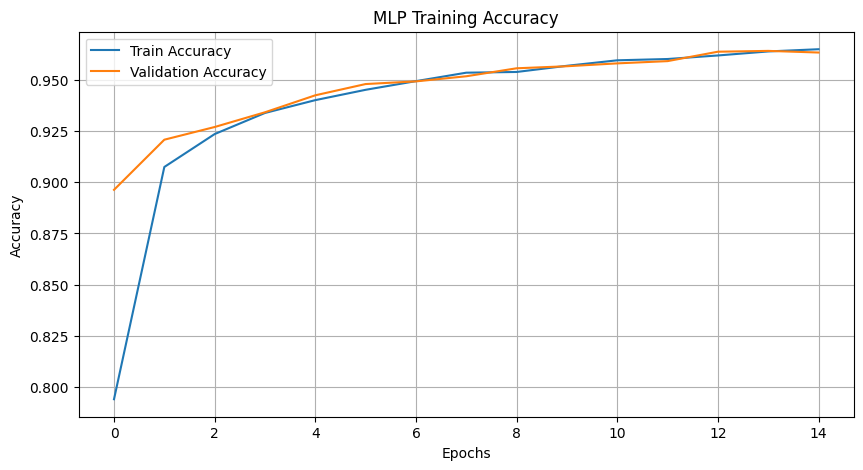

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(MLP_history.history['accuracy'], label='Train Accuracy')
plt.plot(MLP_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MLP Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing some of the reconstructed images #

# We predict first to test samples #

# Displaying original and Reconstructed images #

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


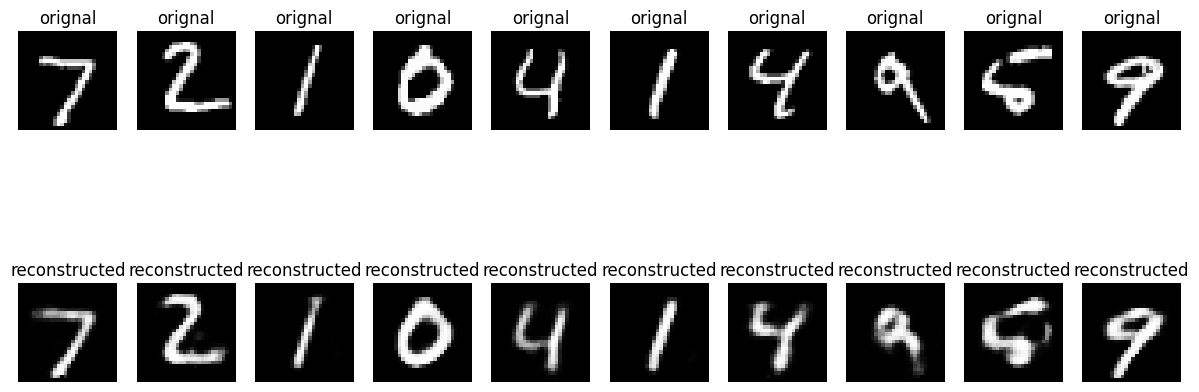

In [19]:
decoded_images = autoencoder.predict(X_test_normalized[:10])
decoded_images = autoencoder.predict(X_test_normalized[:10])
fig, axes = plt.subplots(2, 10, figsize=(15, 6))

for i in range(10):
  axes[0,i].imshow(X_test[i].reshape((28,28)), cmap = 'gray')
  axes[0,i].set_title("orignal")
  axes[0,i].axis('off')

  axes[1,i].imshow(decoded_images[i].reshape(28,28), cmap = 'gray')
  axes[1,i].set_title("reconstructed")
  axes[1,i].axis('off')

plt.show()

# prediction first 10 images using the trained MLP #

In [20]:
prediction = MLP_model.predict(X_test_encoded[:10])
print("predicted labels:", np.argmax(prediction, axis=1))
print("actual labels:", np.argmax(y_test[:10], axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
predicted labels: [7 2 1 0 4 1 4 9 6 9]
actual labels: [7 2 1 0 4 1 4 9 5 9]
